# Capstone Webscrapping Project



We want to get historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 9/4/2020 and 3/3/2021 from website exchange-rates.org

## Requesting the Data

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. After we inspect the data table in the website, we found that the key is 'table' and the class is 'table table-striped table-hover table-hover-solid-row table-simple history-data'

In [5]:
table = soup.find('table',attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-4-2021">
     14,261.85426
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-4-2021">
     USD IDR rate for 3/4/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/3/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


In [6]:
#Inspecting all the tablerow,tablebody,tablehead and cells that has been requested

tr = table.find_all('tr')
tr[0:135]

#we found rows that need to be excluded, row number 13 and 37

[<tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>,
 <tr><td>3/1/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-1-2021">USD IDR rate for 3/1/2021</a></td></tr>,
 <tr><td>2/26/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/2-26-2021">14,300.27815</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/R

In [7]:
#Data scrapping starts from here:
#1.create the column identity
#2.exclude the invalid rows (row 13 and 37)
#3.sort the data in timely manner

temp = [] #initiating a tuple f

for i in range(1,12):
    row = table.find_all('tr')[i]

    #get date
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get weekday 
    weekday = row.find_all('td')[1].text
    weekday = weekday.strip()
    
    #get IDRtoUSD 
    IDRtoUSD = row.find_all('td')[2].text
    IDRtoUSD = IDRtoUSD.strip()
    
    #get remarks
    remarks = row.find_all('td')[3].text
    remarks = remarks.strip()
               
    temp.append((date,weekday,IDRtoUSD,remarks))
    
for i in range(14,36):
    row = table.find_all('tr')[i]

    #get date
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get weekday 
    weekday = row.find_all('td')[1].text
    weekday = weekday.strip()
    
    #get IDRtoUSD 
    IDRtoUSD = row.find_all('td')[2].text
    IDRtoUSD = IDRtoUSD.strip()
    
    #get remarks
    remarks = row.find_all('td')[3].text
    remarks = remarks.strip()
               
    temp.append((date,weekday,IDRtoUSD,remarks))
    
for i in range(38,len(tr)):
    row = table.find_all('tr')[i]

    #get date
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get weekday 
    weekday = row.find_all('td')[1].text
    weekday = weekday.strip()
    
    #get IDRtoUSD 
    IDRtoUSD = row.find_all('td')[2].text
    IDRtoUSD = IDRtoUSD.strip()
    
    #get remarks
    remarks = row.find_all('td')[3].text
    remarks = remarks.strip()
    
    temp.append((date,weekday,IDRtoUSD,remarks))
    
temp 

[('3/3/2021', 'Wednesday', '14,257.29443 IDR', 'USD IDR rate for 3/3/2021'),
 ('3/2/2021', 'Tuesday', '14,256.28041 IDR', 'USD IDR rate for 3/2/2021'),
 ('3/1/2021', 'Monday', '14,248.60576 IDR', 'USD IDR rate for 3/1/2021'),
 ('2/26/2021', 'Friday', '14,300.27815 IDR', 'USD IDR rate for 2/26/2021'),
 ('2/25/2021', 'Thursday', '14,139.73096 IDR', 'USD IDR rate for 2/25/2021'),
 ('2/24/2021', 'Wednesday', '14,083.03673 IDR', 'USD IDR rate for 2/24/2021'),
 ('2/23/2021', 'Tuesday', '14,092.64503 IDR', 'USD IDR rate for 2/23/2021'),
 ('2/22/2021', 'Monday', '14,118.07274 IDR', 'USD IDR rate for 2/22/2021'),
 ('2/19/2021', 'Friday', '14,066.79375 IDR', 'USD IDR rate for 2/19/2021'),
 ('2/18/2021', 'Thursday', '14,013.51318 IDR', 'USD IDR rate for 2/18/2021'),
 ('2/17/2021', 'Wednesday', '14,015.16095 IDR', 'USD IDR rate for 2/17/2021'),
 ('2/15/2021', 'Monday', '13,918.18725 IDR', 'USD IDR rate for 2/15/2021'),
 ('2/12/2021', 'Friday', '13,988.54710 IDR', 'USD IDR rate for 2/12/2021'),
 ('

In [8]:
len(tr)

135

In [9]:
#reverse the data in timely manner
temp = temp[::-1]
temp

[('9/6/2020', 'Sunday', '14,754.95155 IDR', 'USD IDR rate for 9/6/2020'),
 ('9/7/2020', 'Monday', '14,743.92989 IDR', 'USD IDR rate for 9/7/2020'),
 ('9/8/2020', 'Tuesday', '14,839.54267 IDR', 'USD IDR rate for 9/8/2020'),
 ('9/9/2020', 'Wednesday', '14,783.50009 IDR', 'USD IDR rate for 9/9/2020'),
 ('9/10/2020', 'Thursday', '14,871.58664 IDR', 'USD IDR rate for 9/10/2020'),
 ('9/11/2020', 'Friday', '14,865.27553 IDR', 'USD IDR rate for 9/11/2020'),
 ('9/13/2020', 'Sunday', '14,876.45021 IDR', 'USD IDR rate for 9/13/2020'),
 ('9/14/2020', 'Monday', '14,864.65988 IDR', 'USD IDR rate for 9/14/2020'),
 ('9/15/2020', 'Tuesday', '14,843.44670 IDR', 'USD IDR rate for 9/15/2020'),
 ('9/16/2020', 'Wednesday', '14,807.88761 IDR', 'USD IDR rate for 9/16/2020'),
 ('9/17/2020', 'Thursday', '14,829.41738 IDR', 'USD IDR rate for 9/17/2020'),
 ('9/18/2020', 'Friday', '14,730.71792 IDR', 'USD IDR rate for 9/18/2020'),
 ('9/20/2020', 'Sunday', '14,728.84529 IDR', 'USD IDR rate for 9/20/2020'),
 ('9/21/

## Creating data frame & Data wrangling

In [10]:
#Put the array into dataframe

import pandas as pd

df = pd.DataFrame(temp,columns = ('date','weekday','IDRtoUSD','remarks'))
df.head()



,date,weekday,IDRtoUSD,remarks
0,9/6/2020,Sunday,"14,754.95155 IDR",USD IDR rate for 9/6/2020
1,9/7/2020,Monday,"14,743.92989 IDR",USD IDR rate for 9/7/2020
2,9/8/2020,Tuesday,"14,839.54267 IDR",USD IDR rate for 9/8/2020
3,9/9/2020,Wednesday,"14,783.50009 IDR",USD IDR rate for 9/9/2020
4,9/10/2020,Thursday,"14,871.58664 IDR",USD IDR rate for 9/10/2020


In [35]:
#cleaning process

#clean the IDRtoUSD, replace the "," and "IDR" and change it to float data type
df['IDRtoUSD']=df['IDRtoUSD'].replace(",","",regex=True).replace("IDR","",regex=True)
df['IDRtoUSD']=df['IDRtoUSD'].astype('float64')

#change date data type from object to datetime data type
df['date']=df['date'].astype('datetime64')

#change weekday data type from object to categorical data type
df['weekday']=df['weekday'].astype('category')

df

,date,weekday,IDRtoUSD,remarks
0,2020-09-06,Sunday,14754.95155,USD IDR rate for 9/6/2020
1,2020-09-07,Monday,14743.92989,USD IDR rate for 9/7/2020
2,2020-09-08,Tuesday,14839.54267,USD IDR rate for 9/8/2020
3,2020-09-09,Wednesday,14783.50009,USD IDR rate for 9/9/2020
4,2020-09-10,Thursday,14871.58664,USD IDR rate for 9/10/2020
...,...,...,...,...
125,2021-02-25,Thursday,14139.73096,USD IDR rate for 2/25/2021
126,2021-02-26,Friday,14300.27815,USD IDR rate for 2/26/2021
127,2021-03-01,Monday,14248.60576,USD IDR rate for 3/1/2021
128,2021-03-02,Tuesday,14256.28041,USD IDR rate for 3/2/2021


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Analysis and Conclusion

First you can do start with making the data visualisation. 

In [31]:
#subset to get new dataframe with only date and IDRtoUSD column
exchange = df.loc[:,['date','IDRtoUSD']].set_index('date')
exchange

,IDRtoUSD
date,
2020-09-06,14754.95155
2020-09-07,14743.92989
2020-09-08,14839.54267
2020-09-09,14783.50009
2020-09-10,14871.58664
...,...
2021-02-25,14139.73096
2021-02-26,14300.27815
2021-03-01,14248.60576


<AxesSubplot:title={'center':'Grafik Kurs IDR terhadap USD'}, xlabel='Periode', ylabel='Nilai IDR'>

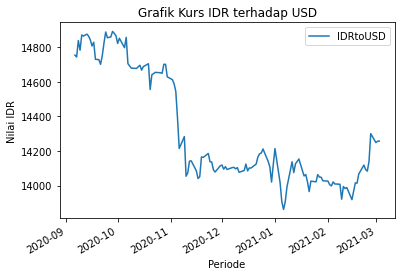

In [32]:
#visualisasi grafik pertama

exchange.plot(xlabel='Periode',ylabel='Nilai IDR',title='Grafik Kurs IDR terhadap USD')

In [150]:
# Analysis dengan grafik kurs IDR terhadap USD di grafik pertama untuk melihat trend nya:

# 1. Nilai IDR terhadap USD dipengaruhi oleh banyak faktor baik itu faktor internal maupun eksternal.

# 2. Nilai IDR terhadap USD pada rentang waktu 2020-09 hingga pertengahan 2021-03 terlihat dari grafik mengalami penurunan
#    yang signifikan. Ini artinya nilai IDR mengalami penguatan terhadap USD.

# 3. Dari grafik terlihat Nilai IDR terhadap USD mengalami kenaikan dimulai dari bulan 2021-02. Ini artinya nilai IDR mengalami penguatan terhadap USD



<AxesSubplot:title={'center':'Grafik Kurs IDR terhadap USD'}, xlabel='Periode', ylabel='Nilai IDR'>

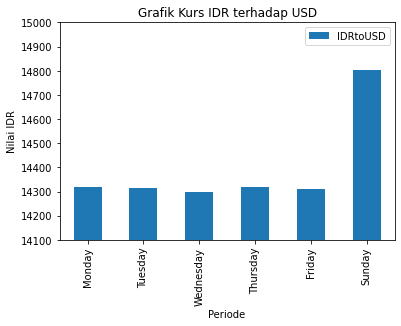

In [45]:
#visualisasi grafik ke dua

daytransaction = df.loc[:,['weekday','IDRtoUSD']]
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Sunday"]
daytransaction_plot = daytransaction.groupby('weekday').mean('IDRtoUSD')
daytransaction_plot = daytransaction_plot.reindex(wday)
daytransaction_plot.plot.bar(xlabel='Periode',ylabel='Nilai IDR',title='Grafik Kurs IDR terhadap USD',ylim=(14100,15000))

In [ ]:
# Analysis dengan grafik kurs IDR terhadap USD di grafik pertama untuk melihat trend nya:

#1. Dari grafik kedua terlihat kenaikan signifikan IDR terhadap USD terjadi rata-rata di hari Sunday. 
#   Artinya ada perlemahan signifikan nilai IDR terhadap USD di hari Sunday

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.